# PROBLEMA 4 

La figura presenta datos experimentales reales sobre el número de desintegraciones $\Delta N$ del mesón π en función del tiempo (Stetz et al., 1973). Observe que el tiempo se ha "agrupado" en intervalos $\Delta t = 10$ ns y que la curva suave es la disminución teórica exponencial esperada para un gran número de piones (que no existe). Su problema es deducir la vida útil τ del mesón π a partir de estos datos (la vida útil tabulada del pión es $2.6 × 10 −8$ s).



<img src="metodos.png"> 

Teoría Supongamos que comenzamos con $N_{0}$ partículas en el tiempo $t = 0$ que pueden descomponerse en otras partículas. Si esperamos un corto tiempo $Δt$, entonces un pequeño número $ΔN$ de las partículas decaerá espontáneamente, es decir, sin influencias externas. Esta descomposición es un proceso estocástico, lo que significa que hay un elemento de azar involucrado en cuándo ocurrirá una descomposición, por lo que no se espera que dos experimentos den exactamente los mismos resultados. La ley básica de la naturaleza para la descomposición espontánea es que el número de desintegraciones ΔN en un intervalo de tiempo Δt es proporcional al número de partículas N (t) presentes en ese momento y al intervalo de tiempo

\begin{equation*}
\Delta N(t)=-\frac{1}{\tau}N(t)\Delta t\rightarrow \frac{\Delta N(t)}{\Delta t}=-\lambda N(t)             
\end{equation*}

Aquí $τ = 1 ∕ λ$ es la vida útil de la partícula, con $λ$ el parámetro de velocidad. La tasa de desintegración real viene dada por la segunda ecuación en (7.38). Si el número de desintegraciones $ΔN$ es muy pequeño en comparación con el número de partículas N, y si observamos intervalos de tiempo muy pequeños, la ecuación de diferencia (7.38) se convierte en la ecuación diferencial.

\begin{equation*}
\frac{dN(t)}{dt} \simeq -\lambda N(t)=\frac{1}{\tau}N(t)
\end{equation*}

Esta ecuación diferencial tiene una solución exponencial tanto para el número como para la tasa de desintegración:

\begin{equation*}
N(t)= N_{0}e^{\frac{-t}{\tau }}
\end{equation*}

\begin{equation*}
\frac{dN(t)}{dt}=-\frac{N_{0}}{\tau }e^{\frac{-t}{\tau }}=\frac{dN(0)}{dt}e^{\frac{-t}{\tau }}
\end{equation*}

La ecuación anterior es la fórmula teórica que deseamos "ajustar" a los datos de la figura anterior. La salida de tal ajuste es un "mejor valor" para la vida útil $τ$.

In [1]:
from numpy import arange, loadtxt
import numpy as np
import matplotlib.pyplot as plt
from math import cos,sin,pi
from pylab import imshow, figure, title
from pylab import plot, show, legend, xlabel, ylabel, title, grid

In [2]:
data = open("pion_decay_rubin.dat") # abro el archivo donde está el valor de t en la primera 
#columna  y el valor de N en la segunda columna

In [3]:
#creacion de posiciones para t y N

t=[] #tiempo
N=[] # decaimiento

# lectura de los datos de pion_decay_rubin
for line in data:
    rline = line.rstrip('\n').split()
    if len(rline) == 2:
        if rline[0] != "//":
            t.append(float(rline[0]))
            N.append(float(rline[1]))

# vuelvo la lista un arreglo para mejor  manipulación
t = np.array(t)
N = np.array(N)

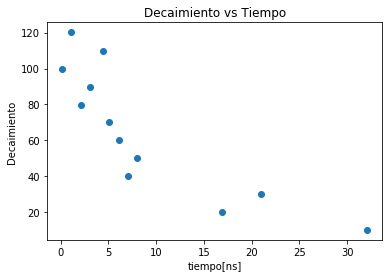

In [4]:
plt.plot(N,t,'o')
plt.ylabel('Decaimiento')
plt.title('Decaimiento vs Tiempo')
plt.xlabel('tiempo[ns]')
plt.show()

In [5]:
from scipy.optimize import curve_fit

In [6]:
def f_line(x,a,b):
    return a*x + b

In [7]:
popt, pcov = curve_fit(f_line, t, N)


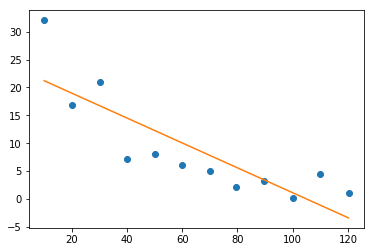

In [8]:
plt.plot(t, N, 'o')
plt.plot(t, f_line(t, *popt), '-')
plt.show()